In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# load the data
country_df = pd.read_csv("Country-data.csv")

#read the data file to know the columns and their values
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
# check no of rows and columns in country_df data
country_df.shape

(167, 10)

In [4]:
# check data type in data set
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
# Check Numeric columns in country_df data
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


#### handling exports, health and import values

-  In data dictionary it is mentioned exports, health and import values are percentage of GDP so we will convert the respective values into original value

In [6]:
country_df['exports'] = round((country_df['exports']*country_df['gdpp'])/100,2)
country_df['health'] = round((country_df['health']*country_df['gdpp'])/100,2)
country_df['imports'] = round((country_df['imports']*country_df['gdpp'])/100,2)

In [7]:
# check the dataset again
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.92,248.30,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.90,1987.74,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.98,1400.44,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.60,1514.37,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100,1.44,76.8,2.13,12200


#### Missing Values Check and Treatment

In [8]:
country_df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

As per above data info, there is no missing values into the data set. We can move ahead

In [9]:
# check for spelling mistake in country column

print(country_df['country'].unique())

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada'
 'Cape Verde' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Congo, Dem. Rep.' 'Congo, Rep.' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Cyprus' 'Czech Republic' 'Denmark' 'Dominican Republic'
 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia'
 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana'
 'Greece' 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti'
 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel'
 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan' 'Kenya' 'Kiribati'
 'Kuwait' 'Kyrgyz Republic' 'Lao' 'Latvia' 'Lebanon' 'Lesotho' 'Liberia'
 '

There is no spelling mistake in country name so we can go ahead to next step.

#### Check for the outliers

- Here in our analysis to find out the outliers, we have considered continuous columns and analyzed the statistics of them.

In [10]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
country_df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618862,1056.733174,6588.352096,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885789,1801.408921,14710.810423,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.080000,12.820000,0.650000,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535000,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.890000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,17760.600000,3825.416000,15034.280000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,31385.100000,4966.701000,24241.560000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,64794.260000,8410.330400,55371.390000,84374.000000,41.478000,82.370000,6.563600,79088.000000


From the distribution shown above, we can see that there are outliers in the data.

Let's plot the boxplot to check the outliers.

In [11]:
country_df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

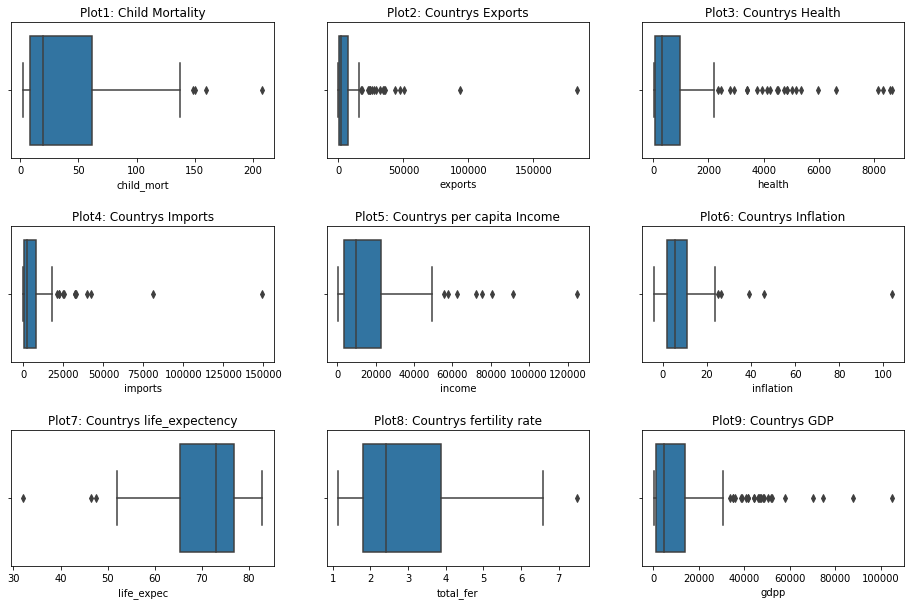

In [12]:
plt.figure(figsize=(16,10))
plt.subplot(3,3,1)
sns.boxplot(country_df.child_mort)
plt.title('Plot1: Child Mortality')
plt.subplot(3,3,2)
sns.boxplot(country_df.exports)
plt.title('Plot2: Country''s Exports')
plt.subplot(3,3,3)
sns.boxplot(country_df.health)
plt.title('Plot3: Country''s Health')
plt.subplot(3,3,4)
sns.boxplot(country_df.imports)
plt.title('Plot4: Country''s Imports')
plt.subplot(3,3,5)
sns.boxplot(country_df.income)
plt.title('Plot5: Country''s per capita Income')
plt.subplot(3,3,6)
sns.boxplot(country_df.inflation)
plt.title('Plot6: Country''s Inflation')
plt.subplot(3,3,7)
sns.boxplot(country_df.life_expec)
plt.title('Plot7: Country''s life_expectency')
plt.subplot(3,3,8)
sns.boxplot(country_df.total_fer)
plt.title('Plot8: Country''s fertility rate')
plt.subplot(3,3,9)
sns.boxplot(country_df.gdpp)
plt.title('Plot9: Country''s GDP')
plt.subplots_adjust(hspace = 0.5)
plt.show()

We see that almost all the columns has high outliers. However let's not remove outliers 
from all the columns as this might lead to loss in data. Let's first remove the outliers from GDP column and check the outliers again.


In [14]:
# removing (statistical) outliers - GDP
Q1 = country_df.gdpp.quantile(0.01)
Q3 = country_df.gdpp.quantile(0.95)
#IQR = Q3 - Q1
country_df = country_df[(country_df.gdpp <= Q3)]

In [16]:
# check the outliers again

# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
country_df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,150.000000,150.000000,150.000000,150.000000,150.00000,150.000000,150.000000,150.000000,150.000000
mean,42.118000,3741.181000,569.654867,3584.658667,12988.42000,8.459880,69.378000,3.080333,8000.093333
std,40.807435,5598.611366,872.291612,4781.468842,13612.49338,10.916887,8.616566,1.539986,9870.500513
min,3.200000,1.080000,12.820000,0.650000,609.00000,-4.210000,32.100000,1.230000,231.000000
25%,10.900000,395.640000,67.250000,455.272500,2977.50000,2.145000,63.200000,1.862500,1295.000000
50%,24.100000,1397.215000,230.235000,1606.595000,8955.00000,5.805000,71.350000,2.600000,4115.000000
75%,63.375000,4736.850000,653.567500,4529.640000,17950.00000,11.975000,76.100000,4.322500,10700.000000
90%,108.100000,10884.460000,1466.379000,10067.850000,29680.00000,17.200000,79.140000,5.364000,22140.000000
95%,117.650000,14543.415000,2411.901000,12121.340000,36585.00000,21.725000,80.300000,6.024000,32395.000000
99%,155.100000,26452.405000,4301.494400,20030.500000,66576.00000,42.617000,81.553000,6.570400,39767.000000


We can see most of the outliers are handled just by handling gdpp column

##### we can move to next step and start visualizing the data.

### Univariate Analysis - Continuous

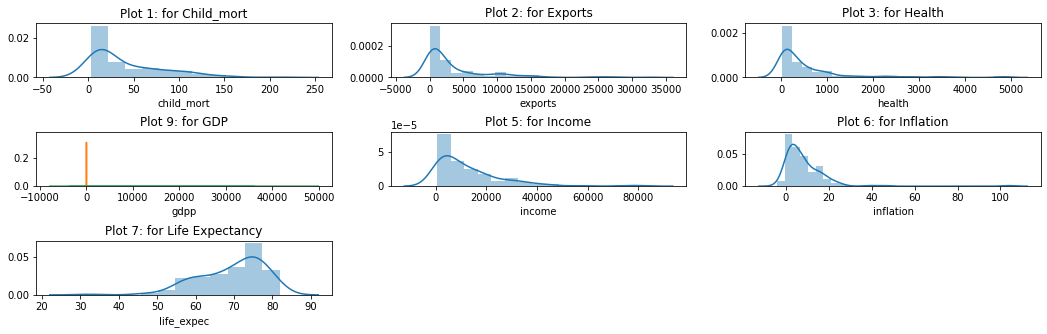

In [17]:
plt.figure(figsize = (18,5))

plt.subplot(3, 3, 1)
plt.title('Plot 1: for Child_mort' )
sns.distplot(country_df.child_mort)

plt.subplot(3, 3, 2)
plt.title('Plot 2: for Exports' )
sns.distplot(country_df.exports)

plt.subplot(3, 3, 3)
plt.title('Plot 3: for Health' )
sns.distplot(country_df.health)

plt.subplot(3, 3, 4)
plt.title('Plot 4: for Imports' )
sns.distplot(country_df.imports)

plt.subplot(3, 3, 5)
plt.title('Plot 5: for Income' )
sns.distplot(country_df.income)

plt.subplot(3, 3, 6)
plt.title('Plot 6: for Inflation' )
sns.distplot(country_df.inflation)

plt.subplot(3, 3, 7)
plt.title('Plot 7: for Life Expectancy' )
sns.distplot(country_df.life_expec)

plt.subplot(3, 3, 4)
plt.title('Plot 8: for Total Fertility Rate' )
sns.distplot(country_df.total_fer)

plt.subplot(3, 3, 4)
plt.title('Plot 9: for GDP' )
sns.distplot(country_df.gdpp)

plt.subplots_adjust(hspace = 1.0)
plt.show()

###### Insights of each plots draw above:

###### Plot 1 : Child Mortality
- There are many countries which has very less child mortality thats why it has peak at below 50. 

###### Plot 2 : Exports
- Poor countries has less exports so there is peak at start below 5000.

###### Plot 3 : Health
- Poor countries do not have high budget for health so there is peak at start at below 1000.

###### Plot 4 : GDP
- Poor countries do not have high GDP so there is almost flat curve for GDP

###### Plot 5 : Income
- Per capita income is less for poor countries so there is peek at start close to zero. 

###### Plot 6 : Inflation
- Inflation rate are less for countries so peak is at start near to zero only. 

###### Plot 7 : Life Expectancy
- Life expectancy is high except few countries so peak is at around 75.

### Bivariate Analysis: Continuous - Continuous

<Figure size 288x288 with 0 Axes>

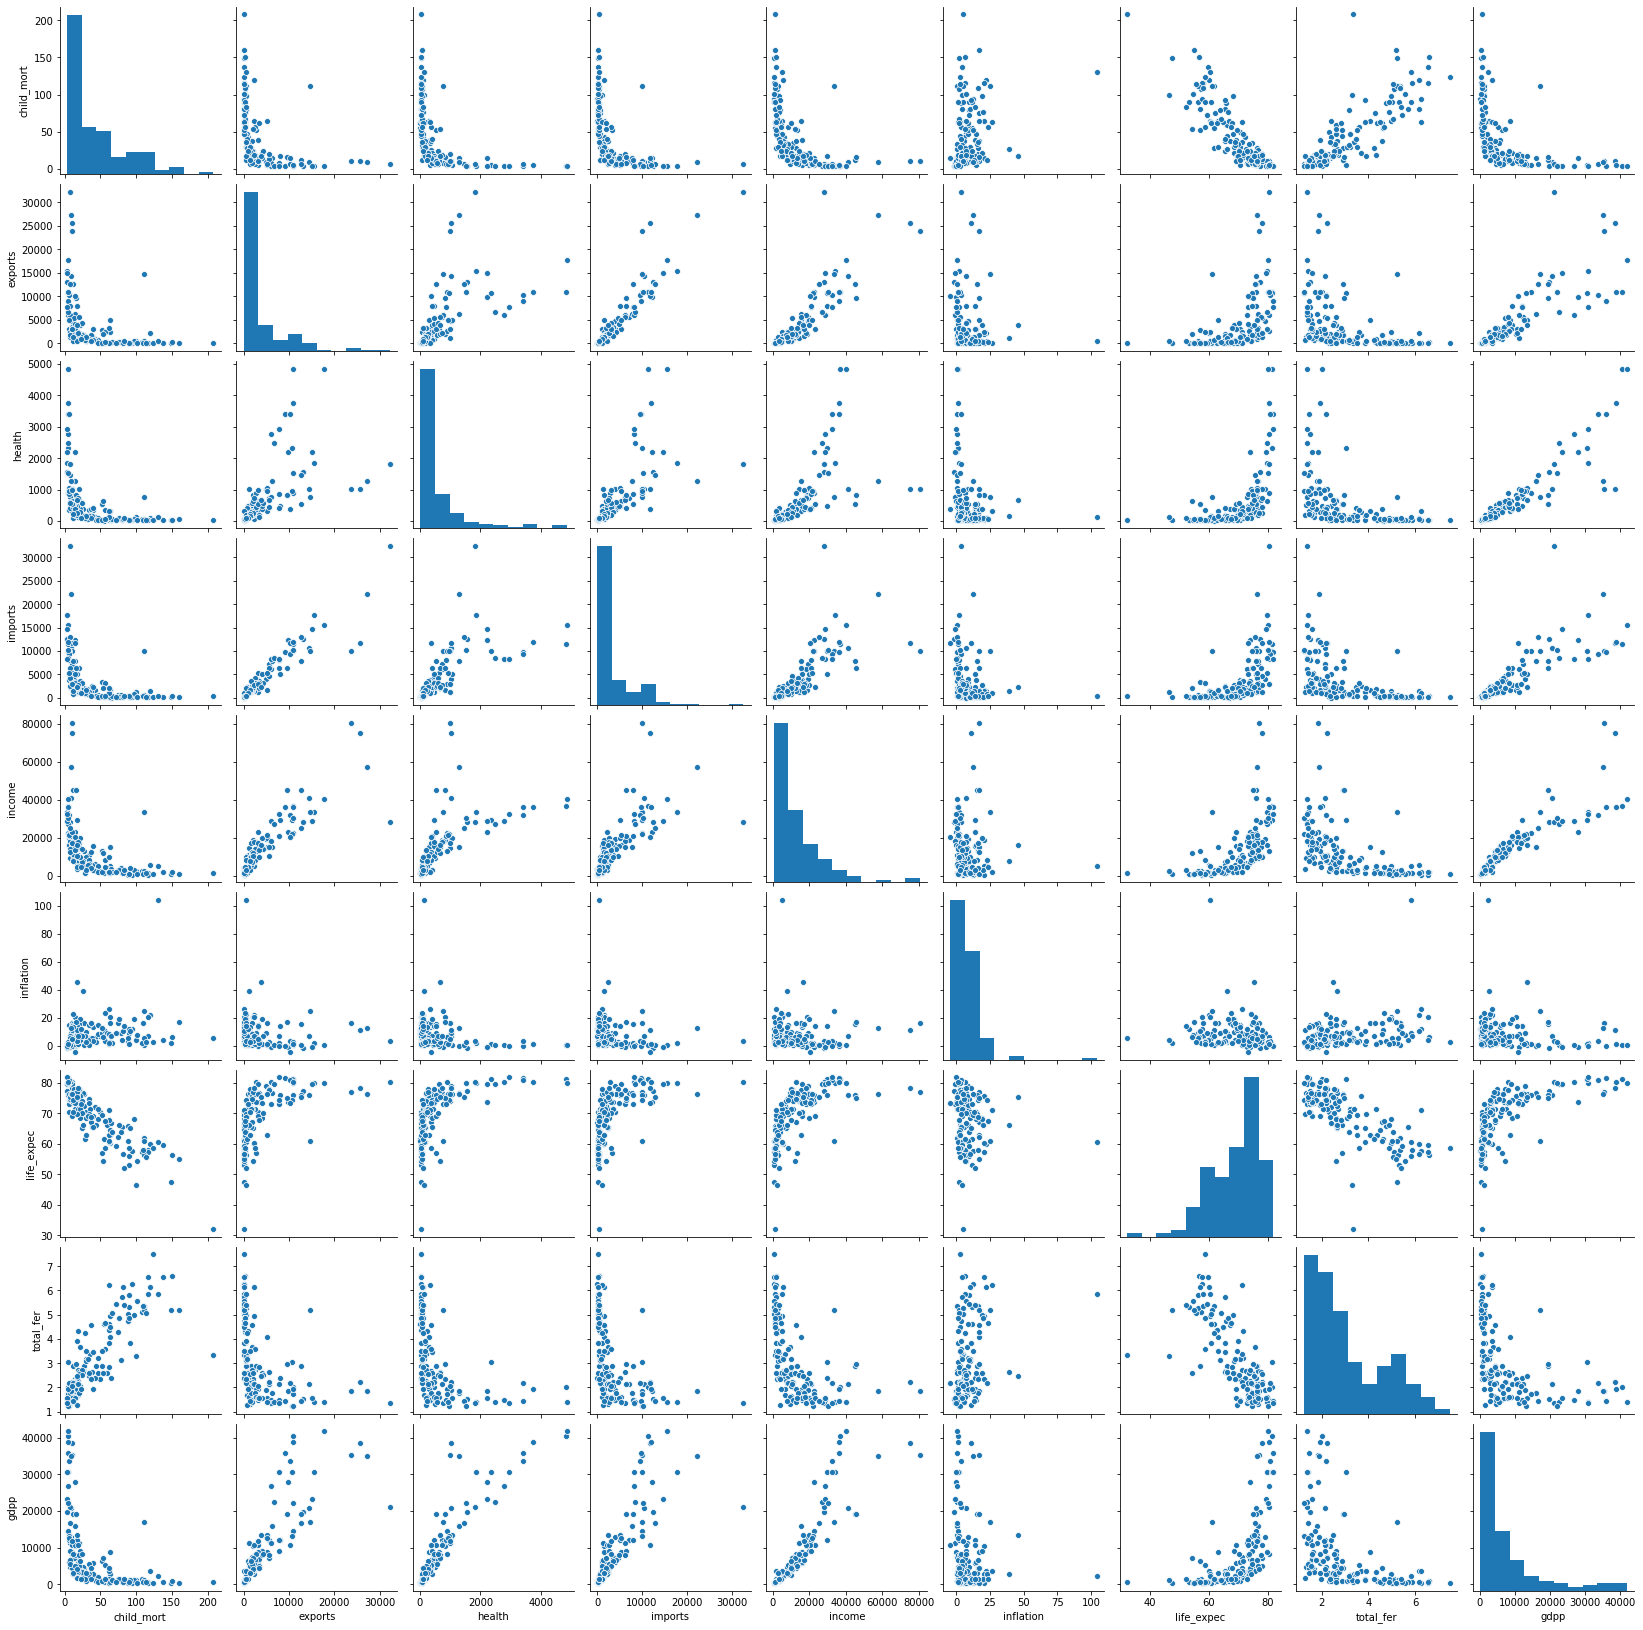

In [18]:
#pairplot of numerical variables
plt.figure(figsize = (4,4))
sns.pairplot(country_df)
plt.show()

###### Insights of each plots draw above:

###### 1. GDP vs Child_mort

- it's clearly indicates there is negative correlation between GDP and child mortality. As GDP increases Child mortality decreases

###### 2. GDP vs exports

- GDP and exports has positive correlation. GDP increases exports also increases.

###### 3. GDP vs health

- GDP and health has positive correlation. GDP increases health also increases.

###### 4. GDP vs imports

- GDP and imports has positive correlation. GDP increases imports also increases.

###### 5. GDP vs income

- GDP and income has positive correlation. GDP increases income also increases.

###### 6. GDP vs inflation

- countries having low GDP has higher inflation rate.

###### 7. GDP vs life_expec

- countries having high GDP has higher life epectancy.

###### 8. GDP vs total_fert

- countries with low GDP has higher fertility rate.

### Correlation

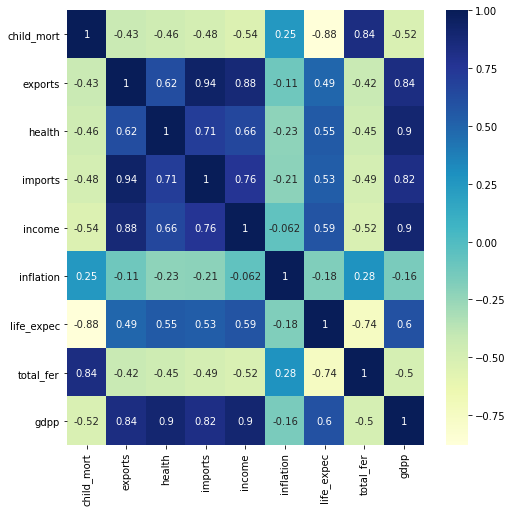

In [63]:
# Let us draw heatmap to understand the corelation better.
plt.figure(figsize = (8,8))  
sns.heatmap(country_df.corr(),annot = True,cmap="YlGnBu")

We see high correlation between `total_fer` and `child_mort`, between `gdpp` and `income`,between `gdpp`and `health`and between `imports` and `exports`

#### Data preparation for modeling

- gdpp - GDP per capita
- child_mort - Death of children under 5 years of age per 1000 live births
- income - Net income per person

In [112]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.92,248.30,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.90,1987.74,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.98,1400.44,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.60,1514.37,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100,1.44,76.8,2.13,12200


#### Scaling the data:

In [20]:
# import sklearn
from sklearn.preprocessing import StandardScaler

In [21]:
country_norm = country_df.drop("country", axis=1)

In [22]:
#instantitate scaler
scaler = StandardScaler()

# fit transform

country_norm_scaled = scaler.fit_transform(country_norm)

In [23]:
country_norm_scaled.shape

(150, 9)

In [24]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [25]:
#First convert the numpy array that you have to a dataframe

country_norm_scaled = pd.DataFrame(country_norm_scaled)
country_norm_scaled.columns = ['child_mort', 'exports', 'health', 'imports', 'income','inflation','life_expec','total_fer','gdpp']
country_norm_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.182213,-0.660562,-0.607025,-0.700106,-0.838681,0.090081,-1.534503,1.784980,-0.757007
1,-0.627422,-0.465236,-0.347092,-0.335100,-0.225430,-0.364864,0.806027,-0.931908,-0.397466
2,-0.364337,-0.363543,-0.441321,-0.458339,-0.006517,0.702189,0.829316,-0.124008,-0.359855
3,1.890331,-0.276347,-0.539529,-0.434432,-0.522473,1.281210,-1.080370,2.006501,-0.454391
4,-0.782323,0.324345,0.190947,0.755669,0.450473,-0.645184,0.864250,-0.619172,0.426926


In [26]:
#Use the Hopkins Statistic function by passing the above dataframe as a paramter
hopkins(country_norm_scaled)

0.9308744078298834

Since the value is > 0.7 the given dataset has a good tendency to form clusters.

# 4. Modelling

In [27]:
from sklearn.cluster import KMeans

### K-means with some K:

## Finding the Optimal Number of Clusters

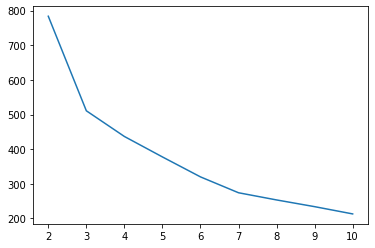

In [28]:
# elbow-curve/SSD

ssd = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(country_norm_scaled)
    ssd.append([k, kmean.inertia_])
    
temp = pd.DataFrame(ssd)
plt.plot(temp[0], temp[1])

There is a curve at 3 so we can take k =3

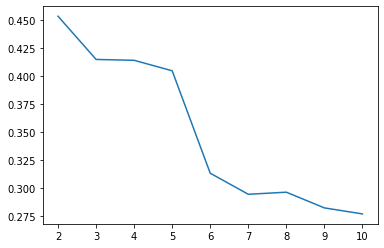

In [29]:
from sklearn.metrics import silhouette_score
ss = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(country_norm_scaled)
    ss.append([k, silhouette_score(country_norm_scaled, kmean.labels_)])
temp = pd.DataFrame(ss)    
plt.plot(temp[0], temp[1])

By silhouette score also it indicates k =3 so we will go with k =3 as clusters for k-means clustering

In [30]:
# final model with k=3

kmeans = KMeans(n_clusters=3, random_state = 50)
kmeans.fit(country_norm_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [31]:
kmeans.labels_

array([0, 2, 2, 0, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2,
       0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 1, 2, 2, 2, 2,
       0, 0, 1, 2, 1, 0, 0, 2, 1, 0, 1, 2, 2, 0, 0, 2, 0, 1, 2, 2, 2, 2,
       1, 1, 2, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0,
       1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 1, 0, 0, 1, 0, 2, 2, 2, 2, 2,
       1, 2, 2, 0, 2, 1, 0, 2, 2, 0, 1, 1, 0, 2, 1, 1, 2, 2, 0, 2, 2, 0,
       2, 0, 0, 2, 2, 2, 2, 0, 2, 1, 1, 2, 2, 2, 2, 2, 0, 0], dtype=int32)

In [32]:
# assign the label
country_cluster = country_df.copy()
country_cluster['cluster_id'] = kmeans.labels_
country_cluster.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.92,248.30,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.90,1987.74,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,1712.64,185.98,1400.44,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,2199.19,100.60,1514.37,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100,1.44,76.8,2.13,12200,2


In [33]:
country_cluster.cluster_id.value_counts()

2    81
0    45
1    24
Name: cluster_id, dtype: int64

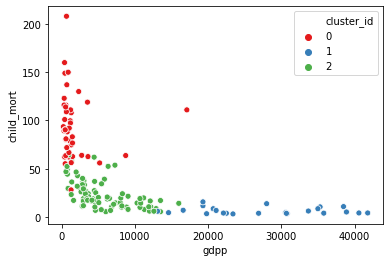

In [34]:
# Plot the cluster (GDPP Vs Child_mort)
sns.scatterplot(x = 'gdpp', y = 'child_mort', hue = 'cluster_id', data = country_cluster, palette = 'Set1')

Above plots clearly indicates countries in cluster 0 has low GDP and high child mortality and countries in cluster 1 has high GDP and low child mortality

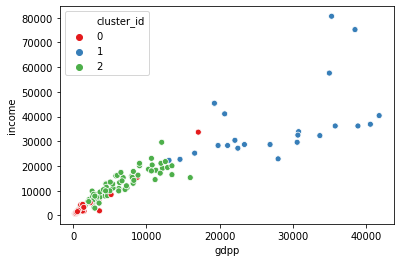

In [35]:
# Plot the cluster (GDPP Vs Income)
sns.scatterplot(x = 'gdpp', y = 'income', hue = 'cluster_id', data = country_cluster, palette = 'Set1')

Above plots clearly indicates countries in cluster 0 has low GDP and low income and countries in cluster 1 has high GDP and high income

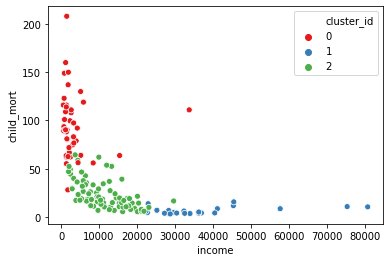

In [64]:

# Plot the cluster
sns.scatterplot(x = 'income', y = 'child_mort', hue = 'cluster_id', data = country_cluster, palette = 'Set1')

Above plots clearly indicates countries in cluster 0 has low income and high child mortality and countries in cluster 1 has high income and low child mortality

In [65]:
# check the dataframe agian
country_cluster.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.92,248.30,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.90,1987.74,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,1712.64,185.98,1400.44,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,2199.19,100.60,1514.37,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100,1.44,76.8,2.13,12200,2


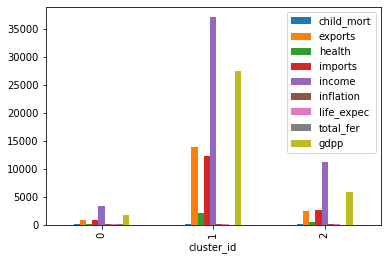

In [86]:
# group the countries into clusters and plot
country_cluster.groupby('cluster_id').mean().plot(kind = 'bar')

Above plot clearly indicates, cluster 0 has low gdp, low income and high child mortality. Let's plot GDP, income and child mortality separatley and check the clusters which need help. 

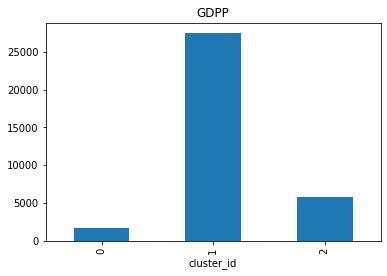

In [67]:
# GDPP plot
country_cluster.groupby('cluster_id')['gdpp'].mean().plot(kind='bar', title = 'GDPP')

Above plot clearly indicates cluster 0 has low GDP and cluster 1 has highest GDP

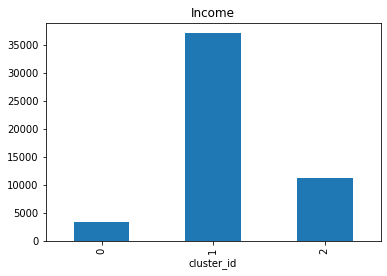

In [68]:
#Income plot
country_cluster.groupby('cluster_id')['income'].mean().plot(kind='bar', title = 'Income')

Above plot clearly indicates cluster 0 has low income and cluster 1 has highest income

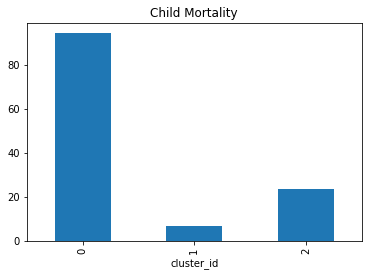

In [69]:
country_cluster.groupby('cluster_id')['child_mort'].mean().plot(kind='bar',title = 'Child Mortality')

Above plot clearly indicates cluster 0 has high child mortality and cluster 1 has lowest child mortality

In [71]:
# check the countries in cluster 0 which need help.
country_cluster[country_cluster['cluster_id'] == 0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.92,248.30,1610,9.440,56.2,5.82,553,0
3,Angola,119.0,2199.19,100.60,1514.37,5900,22.400,60.1,6.16,3530,0
17,Benin,111.0,180.40,31.08,281.98,1820,0.885,61.8,5.36,758,0
25,Burkina Faso,116.0,110.40,38.76,170.20,1430,6.810,57.9,5.87,575,0
26,Burundi,93.6,20.61,26.80,90.55,764,12.300,57.7,6.26,231,0
28,Cameroon,108.0,290.82,67.20,353.70,2660,1.910,57.3,5.11,1310,0
31,Central African Republic,149.0,52.63,17.75,118.19,888,2.010,47.5,5.21,446,0
32,Chad,150.0,330.10,40.63,390.20,1930,6.390,56.5,6.59,897,0
36,Comoros,88.2,126.88,34.68,397.57,1410,3.870,65.9,4.75,769,0
37,"Congo, Dem. Rep.",116.0,137.27,26.42,165.66,609,20.800,57.5,6.54,334,0


##### Sort the countries with Low GDP, Low income and High Child_mort

In [73]:
country_cluster[country_cluster['cluster_id'] == 0].sort_values(by =
                                        ['gdpp','income','child_mort'], ascending = [True, True,False]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
26,Burundi,93.6,20.61,26.80,90.55,764,12.30,57.7,6.26,231,0
88,Liberia,89.3,62.46,38.59,302.80,700,5.47,60.8,5.02,327,0
37,"Congo, Dem. Rep.",116.0,137.27,26.42,165.66,609,20.80,57.5,6.54,334,0
112,Niger,123.0,77.26,17.96,170.87,814,2.55,58.8,7.49,348,0
132,Sierra Leone,160.0,67.03,52.27,137.66,1220,17.20,55.0,5.20,399,0


As per Heirarchical Clustering, the countries which require aid are:
    1. Burundi
    2. Liberia
    3. Congo, Dem. Rep.
    4. Niger
    5. Sierra Leone

## Hierarchical Clustering


In [74]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [75]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.92,248.30,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.90,1987.74,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.98,1400.44,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.60,1514.37,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100,1.44,76.8,2.13,12200


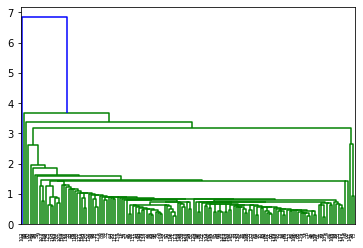

In [76]:
# single linkage
mergings = linkage(country_norm_scaled,method = 'single', metric = 'euclidean')
dendrogram(mergings)
plt.show()

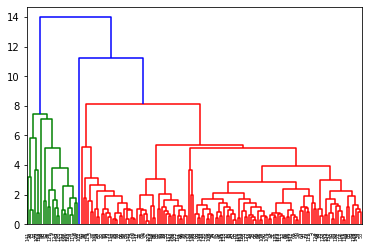

In [77]:
# complete linkage

mergings = linkage(country_norm_scaled, method = 'complete', metric='euclidean')
dendrogram(mergings)
plt.show()

In [78]:
# 4 clusters
cut_tree(mergings, n_clusters = 4).shape

(150, 1)

In [79]:
#reshape to (4293,)
cluster_lables = cut_tree(mergings,n_clusters=4).reshape(-1,)
cluster_lables

array([0, 1, 1, 0, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 2, 2, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 0, 1, 2, 1, 2, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 0, 3, 2, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 2, 1, 1, 1, 0, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 2, 2, 1, 1, 1, 1, 1, 1, 0])

In [80]:
# check the dataframe again
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.92,248.30,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.90,1987.74,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.98,1400.44,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.60,1514.37,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100,1.44,76.8,2.13,12200


In [51]:
# copy the dataframe
country_hc = country_df.copy()

In [81]:
# assign lebel to the countries
country_hc['cluster_lables'] = cluster_lables
country_hc.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_lables
0,Afghanistan,90.2,55.30,41.92,248.30,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.90,1987.74,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,1712.64,185.98,1400.44,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,2199.19,100.60,1514.37,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100,1.44,76.8,2.13,12200,1


##### check the number of countries in each clusters

In [53]:
country_hc['cluster_lables'].value_counts()

1    101
0     25
2     23
3      1
Name: cluster_lables, dtype: int64

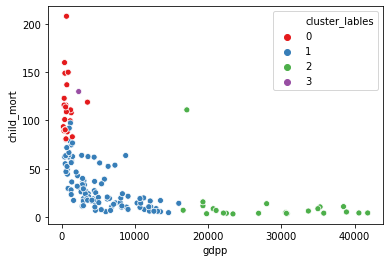

In [83]:
# Plot the cluster (GDPP vs Chils_mort)
sns.scatterplot(x = 'gdpp', y = 'child_mort', hue = 'cluster_lables', data = country_hc, palette = 'Set1')

Above plots clearly indicates countries in cluster 0 has low gdpp and high child mortality and countries in cluster 2 has high gdpp and low child mortality

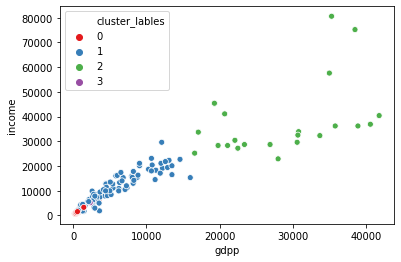

In [84]:
# Plot the cluster (GDPP Vs Income)
sns.scatterplot(x = 'gdpp', y = 'income', hue = 'cluster_lables', data = country_hc, palette = 'Set1')

Above plots clearly indicates countries in cluster 0 has low gdpp and low income and countries in cluster 2 has high gdpp and high income

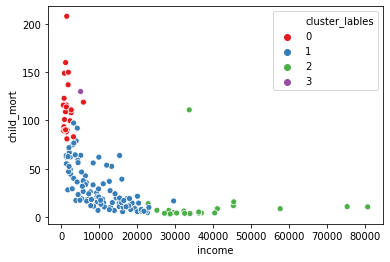

In [85]:
# Plot the cluster (Income Vs child_mort)
sns.scatterplot(x = 'income', y = 'child_mort', hue = 'cluster_lables', data = country_hc, palette = 'Set1')

Above plots clearly indicates countries in cluster 0 has low income and high child mortality and countries in cluster 2 has high income and low child mortality

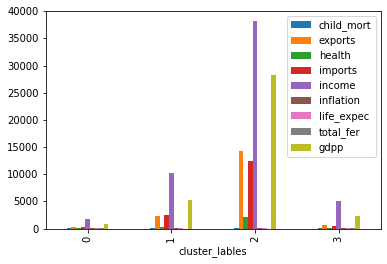

In [87]:
# Group the countries into clusters and plot
country_hc.groupby('cluster_lables').mean().plot(kind = 'bar')

Above plot clearly indicates, cluster 0 has low gdp, low income and high child mortality. Let's plot GDP, income and child mortality separatley and check the clusters which need help.

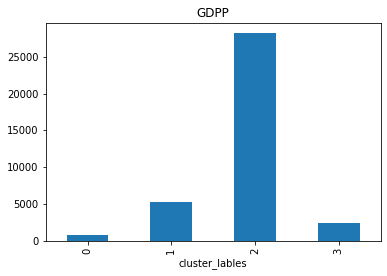

In [89]:
#GDPP plot
country_hc.groupby('cluster_lables')['gdpp'].mean().plot(kind = 'bar', title = 'GDPP')

Above plot clearly indicates cluster 0 has low GDP and cluster 2 has highest GDP

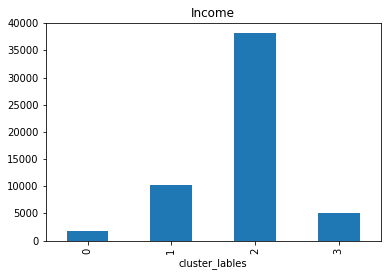

In [91]:
country_hc.groupby('cluster_lables')['income'].mean().plot(kind = 'bar', title = 'Income')

Above plot clearly indicates cluster 0 has low income and cluster 2 has highest income

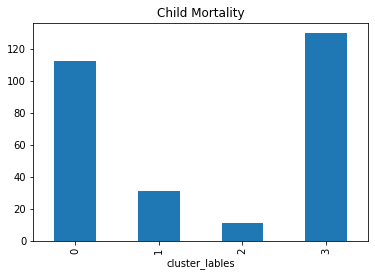

In [93]:
country_hc.groupby('cluster_lables')['child_mort'].mean().plot(kind = 'bar', title= 'Child Mortality')

Above plot clearly indicates cluster 0 has high child mortality and cluster 2 has low child mortality.

Countries which has Low income, Low GDP and High Child_mort need help and cluster 0 has such countries. Let's sort the values by low gdp, low income and high child mortality in cluster 0

In [177]:
country_hc[country_hc['cluster_lables'] == 0].sort_values(by = ['gdpp','income','child_mort'], ascending = [True, True,False]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_lables
26,Burundi,93.6,20.61,26.80,90.55,764,12.30,57.7,6.26,231,0
88,Liberia,89.3,62.46,38.59,302.80,700,5.47,60.8,5.02,327,0
37,"Congo, Dem. Rep.",116.0,137.27,26.42,165.66,609,20.80,57.5,6.54,334,0
112,Niger,123.0,77.26,17.96,170.87,814,2.55,58.8,7.49,348,0
132,Sierra Leone,160.0,67.03,52.27,137.66,1220,17.20,55.0,5.20,399,0


As per Heirarchical Clustering, the countries which require aid are:
    1. Burundi
    2. Liberia
    3. Congo, Dem. Rep.
    4. Niger
    5. Sierra Leone

We got same countries by both K-means and Heirarchical Clustering: 
Therefore following are the countries which are in dire need of aid by considering socio – economic factor into consideration:

    1. Burundi
    2. Liberia
    3. Congo, Dem. Rep.
    4. Niger
    5. Sierra Leone
    